# Содержание
1. [Обзор данных.](#intro) 
2. [Предобработка данных.](#intro1) 
3. [Расчёт значений и создание новых столбцов.](#intro2)
4. [Исследовательский анализ данных.](#intro3)
5. [Общий вывод](#intro4)

# Исследование данных о российском кинопрокате



Заказчик — Министерство культуры Российской Федерации.

**Цель исследования** - изучить рынок российского кинопроката и выявить текущие тренды. Также, уделить внимание фильмам, которые получили государственную поддержку и ответить на вопрос, насколько такие фильмы интересны зрителю.

**Ход исследования**

Перед нами два файла с данными, которые необходимо объединить в единый файл. Для начала получим данные о прокатных удостоверениях из файла `mkrf_movies.csv` и данные о прокате в российских кинотеатрах из файла `mkrf_shows.csv`. После объединим данные из двух файлов в единый, сохраняя все объекты из файла `mkrf_movies.csv`. О качестве данных ничего не известно. Поэтому перед дальнейшим анализом понадобится обзор данных. Проверим данные на ошибки и оценим их влияние на исследование. Далее, на этапе предобработки, поищем возможности исправить критические ошибки данных. 

После того, как все данные будут корректны, приступим к исследовательскому анализу данных.

# 1. Обзор данных <a id='intro'></a>

Откроем файлы с данными и объединим их таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм.  

In [1]:
# импорт библиотеки pandas

import pandas as pd

# импорт библиотеки matplotlib

import matplotlib.pyplot as plt

In [2]:
# перевод экспоненциальных чисел в десятичные и 
# округление до двух знаков после запятой

pd.set_option('display.float_format', lambda x: '%.2f' % x) 

In [3]:
# чтение данных с файлами, сохранение в df и df1 

try:
    df = pd.read_csv('/datasets/mkrf_movies.csv')
    df1 = pd.read_csv('/datasets/mkrf_shows.csv')
except:
    df = pd.read_csv('C:/Users/solod/Downloads/mkrf_movies.csv')
    df1 = pd.read_csv('C:/Users/solod/Downloads/mkrf_shows.csv')

In [4]:
# получение первых 5 строк таблицы df

df.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


In [5]:
# получение первых 5 строк таблицы df1

df1.head()

,puNumber,box_office
0,111000113,2450.00
1,111000115,61040.00
2,111000116,153030013.40
3,111000117,12260956.00
4,111000118,163684057.79


In [6]:
# получение общей информации о данных в таблице df

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [7]:
# получение общей информации о данных в таблице df1

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


In [8]:
# перевод значений столбца 'puNumber' в числовой тип 'float' и
# указание метода в котором некорректные значения принудительно 
# заменяются на NaN

df['puNumber'] = pd.to_numeric(df['puNumber'], errors = 'coerce')

In [9]:
# получение среза в столбце 'puNumber' таблицы df

df.query('puNumber.isna()')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
1797,Курбан-роман. (История с жертвой),NaN,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# замена пропущенного значения на '0' 
# в столбце 'puNumber' таблицы df

df['puNumber'] = df['puNumber'].fillna(0)

In [11]:
# перевод значений столбца 'puNumber' в тип данных 'int'

df['puNumber'] = df['puNumber'].astype('int')

In [12]:
# объединение двух таблиц в единую

df = df.merge(df1, on = 'puNumber', how = 'left')

In [13]:
# получение последних 15 строк таблицы df

df.tail(10)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
7476,Я свободен,111023019,2019-12-26T12:00:00.000Z,Художественный,"АО ""ТПО ""Киностудия им. М.Горького""",Россия,И.Северов,С.Зернов,«12+» - для детей старше 12 лет,0.00,30000000.00,46154000.00,Министерство культуры,5.9,драма,NaN
7477,Тридцать,121038419,2019-12-26T12:00:00.000Z,Художественный,Демнехст ауф видео,Германия,Симона Костова,Джейлан Атаман-Джека,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.3,драма,NaN
7478,(Не)идеальный мужчина,111023119,2019-12-24T12:00:00.000Z,Художественный,"ООО ""Нон-Стоп Продакшн""",Россия,М.Бальчюнас (псевдоним М.Вайсберг),"С.Мелькумов, А.Роднянский, М.Вайсберг, Р.Минас...",«12+» - для детей старше 12 лет,40000000.00,60000000.00,150147502.00,Фонд кино,4.5,"комедия,фантастика,мелодрама",NaN
7479,Эколав,111023219,2019-12-26T12:00:00.000Z,Художественный,ВГИК,Россия,Д.Григорьев,ВГИК,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7480,Акрам Хан: Родом из Карри Хауса,126007919,2019-12-23T12:00:00.000Z,Прочие,Свон Филмз,Великобритания,Ник Пойнц,"Поппи Бегум, Ник Пойнц",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,219569.00
7481,Сад художника: Американский импрессионизм,126008019,2019-12-23T12:00:00.000Z,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7482,Звериная ярость,121037819,2019-12-24T12:00:00.000Z,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.4,"боевик,триллер",NaN
7483,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28T12:00:00.000Z,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7484,"Машины песенки. Серия ""Испанские мотивы""",124010619,2019-12-30T12:00:00.000Z,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7485,"Машины песенки. Серия ""Когда цветут кактусы""",124010719,2019-12-30T12:00:00.000Z,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",И.Трусов,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,6.3,"комедия,вестерн",NaN


In [14]:
# получение общей информации о данных в таблице df

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int32  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

In [15]:
# получение информации об описательных статиcтических данных
# в таблице df

df.describe()

,puNumber,refundable_support,nonrefundable_support,budget,box_office
count,7486.00,332.00,332.00,332.00,3158.00
mean,135178527.64,11864457.83,48980988.89,127229716.68,76478696.16
std,38382177.41,24916555.26,59980117.92,188588333.12,240353122.82
min,0.00,0.00,0.00,0.00,0.00
25%,112025043.00,0.00,25000000.00,42000000.00,86239.00
50%,121015464.50,0.00,30000000.00,68649916.00,2327987.55
75%,124003313.75,15000000.00,40375000.00,141985319.50,23979671.02
max,231001111.00,180000000.00,400000000.00,2305074303.00,3073568690.79


Итак, в таблице 16 столбцов. У столбцов наблюдается 3 типа данных: `float64`, `int64`, `object`.

Согласно документации к данным:

* `title` - название фильма;
* `puNumber` - номер прокатного удостоверения;
* `show_start_date` - дата премьеры фильма;
* `type` - тип фильма;
* `film_studio` - студия-производитель;
* `production_country` - страна-производитель;
* `director` - режиссёр;
* `producer` - продюсер;
* `age_restriction` - возрастная категория;
* `refundable_support` - объём возвратных средств государственной поддержки;
* `nonrefundable_support` -  объём невозвратных средств государственной поддержки;
* `budget` - общий бюджет фильма;
* `financing_source` - источник государственного финансирования;
* `ratings` - рейтинг фильма на КиноПоиске;
* `genres` - жанр фильма;
* `box_office` - сборы в рублях.

В названиях столбцов отсутствует нарушение стиля, кроме столбца `puNumber`, все буквы в названии данного столцба можно привести к нижнему регистру и добавить нижнее подчёркивание.

Также, в столбцах `film_studio`, `production_country`, `director`, `producer`, `refundable_support`, `nonrefundable_support`, `budget`, ` financing_source`, `ratings`, `genres` и `box_office` присутствует меньшее количество значений, чем  в остальных столбцах, следовательно, в данных есть пропущенные значения.

В столбцах `refunable_support`, `nonrefunable_support` и `budget` необходимо перевести значения к типу `int` (целые числа) , а в столбце `ratings` необходимо перевести значения к типу `float` (вещественные числа) для удобства просмотра и дальнейшего анализа даннных. 

В столбце `show_stat_date` необходимо изменить тип данных на `datetime` и убрать часовой пояс.

**Вывод**

В каждом столбце представлена информация о фильмах, в одних столбцах данные более описательного характера, а именно: название фильма, дата премьеры, тип и жанр фильма, студия-производитель, страна-производитель, режиссёр, продюсер, возрастная категория и рейтинг фильма на КиноПоиске. А в других столбцах данные относятся к финансовой составляющей: объём возвратных и невозвратных средств государственной поддержки, общий бюджет фильма, источник государственного финансирования, сборы в рублях. Также есть отдельный столбце в котором представлена информация о номере прокатного удостоверения фильма.

Для более точного и правильного анализа данных необходимо:

* заменить по возможности пропущенные значения в столбцах `film_studio`, `production_country`, `director`, `producer`, `refundable_support`, `nonrefundable_support`, `budget`, ` financing_source`, `ratings`, `genres` и `box_office`;
* перевести значения к типу `int` в столбцах `refunable_support`, `nonrefunable_support` и `budget`;
* перевести значения к типу `float` в столбце `ratings`;
* изменить в столбце `show_stat_date` тип данных на `datetime` и убрать часовой пояс;
* привести название столбца `puNumber` к нижнему регистру и добавить нижнее подчёркивание. 

Также, для объединения двух таблиц в единую, мы уже на этом этапе в столбце `puNumber` заменили пропуски на `0` и привели значения к числовому типу данных.

# 2. Предобработка данных <a id='intro1'></a>

In [16]:
# подсчёт пропущенных значений

df.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   967
genres                    976
box_office               4328
dtype: int64

In [17]:
# подсчёт явных дубликатов

df.duplicated().sum()

0

Явных дубликатов в таблице `df` не наблюдается, посмотрим далее отдельно по столбцам наличие неявных дубликатов.

In [18]:
# получение уникальных значений в
# столбце "title"

df['title'].value_counts()

День святого Валентина_                     5
Там, где живут чудовища                     4
Прощание                                    4
Двойной копец                               4
Дитя тьмы                                   4
                                           ..
Вес воды                                    1
g (джи)                                     1
Звёздные войны. Эпизод 2: Атака клонов      1
Эмоджи фильм                    Пёсик!      1
Эрик Булатов. Моя Третьяковка, серии 1-2    1
Name: title, Length: 6772, dtype: int64

In [19]:
# получение уникальных значений
# столбца "title"

#sorted(df['title'].unique())

Как мы видим в столбце `title` есть значения у которых в начале и в конце строки присутствуют лишние символы: `-`, `_`, `.`, `...` (тире, нижнее подчёркивание, точка и многоточие). Есть одинаковые названия фильмов, которые различаются только символом в конце слова, например `возмездие.` и `возмездие`, `10 лет спустя.` и `10 лет спустя` 

Возможно, неявные дубликаты могли возникнуть по причине того, что выгрузка данных происходила из разных источников, где одно и то же название могло быть записано по разному.

Также, стоит отметить, что значения записаны в разном регистре, где то названия фильмов написаны заглавными буквами, где то строчными. 

Поэтому необходимо привести все названия к единому формату, то есть к нижнему регистру, и убрать лишние символы в начале и в конце строки для более удобного просмотра и цельной картины.

In [20]:
# приведение значений в столбце 'title'
# к нижнему регистру и 
# удаление лишних символов в начале и в конце строки

df['title'] = df['title'].str.lower().str.strip('_\-\.\ ') 

In [21]:
# получение уникальных значений
# столбца "title"

#sorted(df['title'].unique())

In [22]:
# изменение названия столбца 'puNumber'

df.rename(columns = {'puNumber' : 'pu_number'}, inplace = True)

In [23]:
# просмотр уникальных значений столбца 'pu_number'

df['pu_number'].value_counts()

221054410    2
221154310    2
0            1
111008518    1
114002716    1
            ..
121021814    1
224028210    1
121013618    1
121017712    1
126002916    1
Name: pu_number, Length: 7484, dtype: int64

In [24]:
# получение среза данных по столбцу 'pu_number'

df.query('pu_number == 0')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1797,курбан-роман. (история с жертвой),0,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
# получение среза данных по столбцу 'title'

df.query('title == "курбан-роман. (история с жертвой)"')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1797,курбан-роман. (история с жертвой),0,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2078,курбан-роман. (история с жертвой),111009614,2014-09-02T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,0.00


In [26]:
# получение среза данных по столбцу 'pu_number'

df.query('pu_number == 221054410')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
5067,анализируй это!,221054410,2010-05-25T12:00:00.000Z,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.4,"комедия,криминал",NaN
5068,анализируй то!,221054410,2010-05-25T12:00:00.000Z,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.8,"комедия,криминал",NaN


In [27]:
# получение среза данных по столбцу 'pu_number'

df.query('pu_number == 221154310')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4638,как жениться и остаться холостым,221154310,2010-12-17T12:00:00.000Z,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.0,"мелодрама,комедия",NaN
4639,иоанна - женщина на папском престоле /по роман...,221154310,2010-12-17T12:00:00.000Z,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.6,"драма,мелодрама,история",NaN


Как мы видим, в столбце `pu_number` есть 4 фильма у которых одинаковые номера прокатного удостоверения. Стоит отметить, что даты выхода у них тоже совпадают.

Следовательно, необходимо удалить данные строки, так как прокатное удостоверение выдается на определённый фильм с уникальным номером и не может быть у фильма с другим названием.

In [28]:
# удаление строк из таблицы df, где
# в столбце 'pu_number' находятся дубликаты

df = df.drop(index = [4638,4639]).reset_index(drop = True)
df = df.drop(index = [5067,5068]).reset_index(drop = True)

In [29]:
# просмотр среза данных 
# по значениям столбца 'pu_number'

df.query('pu_number == 221054410 and pu_number == 221154310')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office


In [30]:
# перевод значений столбца 'first_day_exposition' в тип данных 'datetime' и
# удаление часового пояса 

df['show_start_date'] = pd.to_datetime(df['show_start_date'], format = '%Y-%m-%dT%H:%M:%S')
df['show_start_date'] = df['show_start_date'].apply(lambda x: x.replace(tzinfo = None))

In [31]:
# получение первых 5 значений
# столбца 'show_start_date'

df['show_start_date'].head()

0   2015-11-27 12:00:00
1   2016-09-13 12:00:00
2   2016-10-10 12:00:00
3   2016-06-10 12:00:00
4   2015-07-29 12:00:00
Name: show_start_date, dtype: datetime64[ns]

In [32]:
# получение уникальных значений столбца 'type'

df['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

Как мы видим в столбце `type` у некоторых значений, а именно `Художественный`и `Анимационный`, есть пробелы в начале строки. Удалим данные пробелы и неявные дубликаты соответственно.

Также приведём названия типов фильма к нижнему регистру.

Можно также предположить, что неявные дубликаты могли возникнуть по причине того, что значения были собраны из разных источников, тем самым однотипные названия отличаются по определённым признакам.

In [33]:
# приведение значений в столбце 'type'
# к нижнему регистру и 
# удаление пробелов в начале и в конце строки

df['type'] = df['type'].str.strip().str.lower()

In [34]:
# получение уникальных значений столбца 'type'

df['type'].unique()

array(['художественный', 'анимационный', 'прочие', 'документальный',
       'научно-популярный', 'музыкально-развлекательный'], dtype=object)

В столбце `film_studio` мы видим наличие пропущенных значений, поэтому необходимо заменить пропуски на значение `не определена`.  

Данный способ представляется самым отимальным в подобном случае, так как в данном столбце представлены категориальные значения, а у нас нет точной информации, какие именно значения пропущены в столбце. 

In [35]:
# замена пропущенных значений в столбце 'film_studio'

df['film_studio'] = df['film_studio'].fillna('не определена')

In [36]:
# получение уникальных значений в 
# столбце 'film_studio'

df['film_studio'].value_counts()

Киностудия "Мосфильм"                                                                                                    341
ООО "Мульт в кино"                                                                                                        57
Анимаккорд Лтд                                                                                                            23
не определена                                                                                                             18
ООО "Мульт в кино"                                                                                                        18
                                                                                                                        ... 
Центропа Интертейнмент, Дэт Данске Филминститут, Ти Ви 2 Денмарк                                                           1
Фекшн М, Преферед Контэнт, Гай А.Данелла Продакшнз                                                                         1


In [37]:
# получение уникальных значений
# столбца 'film_studio'

#sorted(df['film_studio'].unique())

В столбце `film_studio` мы также обнаружили пробелы в конце строки, поэтому уберём данные пробелы. Стоит отметить, что значения записаны в разном регистре, необходимо привести их единому формату, строчным буквам, то есть к нижнему регистру.

Также в столбце есть неявные дубликаты, например, `Сони Пикчерс Интертейнмент` и `Сони Пикчерз Интертейнмент`. Заменим слова `Пикчерс` на `Пикчерз`, `Продакшен, Продакшнз, Продакшнс` на `Продакшн` и `Фильмс, Фильмз, Филмс` на `Филмз`, `Коламбиа, Каламбиа` на `Коламбия`.

Также, возможно, что, как и в предыдущих столбцах, где обнаружены пробелы или неявные дубликаты, возникновение подобных явлений можно отнести к выгрузке значений из разных источников, где данные записаны по разному.

In [38]:
# приведение значений в столбце 'film_studio'
# к нижнему регистру и 
# удаление пробелов в начале и в конце строки

df['film_studio'] = df['film_studio'].str.strip().str.lower()

In [39]:
# создание переменной, где указан словарь и
# создание функции
# для замены одного значения на другое

synonyms = {
    'Продакшн': ['Продакшен', 'Продакшнз', 'Продакшнс'], 
    'Филмз': ['Фильмс', 'Фильмз', 'Филмс', 'филмс'], 'Коламбия': ['Коламбиа', 'Каламбиа']
}

def check_synonyms(cell):
    '''
    Сверяет значения в столбце и в переменной 'synonyms' и 
    проводит замену старого значения на новое.
    '''
    for name, syn in synonyms.items():
        for s in syn:
            if s in cell: return cell.replace(s, name)
    return cell

df['film_studio'] = df['film_studio'].fillna('').apply(check_synonyms) 

In [40]:
# замена одного значения на другое 
# в столбце 'film_studio'

df['film_studio'] = df['film_studio'].str.replace('Пикчерс','Пикчерз') 

In [41]:
# получение уникальных значений
# столбца 'film_studio'

#sorted(df['film_studio'].unique())

In [42]:
# получение среза по пропущенным значениям
# в столбце 'production_country'

df.query('production_country.isna()') 

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3186,"детский юмористический киножурнал ""ералаш. ну ...",111001216,2016-02-09 12:00:00,художественный,"ооо ""продюсерский центр ералаш""",NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.2,"детский,комедия",194527.00
4441,мульт личности. выпуск 5,214000410,2010-01-25 12:00:00,художественный,не определена,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.0,"мультфильм,комедия",NaN


Заменим пропущенные значения в столбце `production_country` на значение `не определена`.

 

In [43]:
# замена пропущенных значений 
# в столбце 'production_country'

df['production_country'] = df['production_country'].fillna('не определена')

In [44]:
# получение уникальных значений в 
# столбце 'production_country'

df['production_country'].value_counts()

США                                             2171
Россия                                          1821
СССР                                             347
Франция                                          300
Великобритания                                   257
                                                ... 
Швеция, Франция, Великобритания                    1
КНР-США                                            1
Дания - Швеция - Италия - Франция - Германия       1
Парагвай                                           1
СССР                                               1
Name: production_country, Length: 951, dtype: int64

In [45]:
# получение уникальных значений
# столбца 'production_country'

#df['production_country'].unique()

В столбце `production_country` встречаются пробелы в начале и в конце строки, поэтому уберём данные пробелы.

In [46]:
# удаление пробелов в начале и в конце строки
# в столбце 'production_country'

df['production_country'] = df['production_country'].str.strip()

Заменим пропущенные значения в столбце `director` на значение `не определён`.

In [47]:
# замена пропущенных значений
# в столбце 'director'

df['director'] = df['director'].fillna('не определён')

In [48]:
# получение уникальных значений в 
# столбце 'director'

df['director'].value_counts()

О.Семёнова                               47
Д.Червяцов                               17
Стивен Содерберг                         17
Ридли Скотт                              16
Тиль Швайгер                             14
                                         ..
Д.Боголепов                               1
И.Копылов, С.Щербин                       1
Камаль Бансаль                            1
Фернандо Гонзалез Молина                  1
Л.Шмурьева (псевдоним Лика Алексеева)     1
Name: director, Length: 4812, dtype: int64

In [49]:
# получение уникальных значений
# столбца 'director'

#sorted(df['director'].unique())

В столбце `director` также, как в предыдущих категориальных столбцах присутствуют пропуски в начале и в конце строки, есть неявные дубликаты, которые отличаются только пропуском, например 'Бен Уитли   ', 'Бен Уитли', поэтому тоже уберём пропуски.

In [50]:
# удаление пробелов в начале и в конце строки
# в столбце 'director'

df['director'] = df['director'].str.strip()

Заменим пропущенные значения в столбце `producer` на значение `не определён`.

In [51]:
# замена пропущенных значений
# в столбце 'producer'

df['producer'] = df['producer'].fillna('не определён')

In [52]:
# получение уникальных значений в 
# столбце 'producer'

df['producer'].value_counts()

не определён                                              568
П.Смирнов                                                  67
Олег Кузовков, Дмитрий Ловейко, Марина Ратина              28
С.Сельянов                                                 18
Д.Ловейко, О.Кузовков                                      17
                                                         ... 
Кодзи Вакамацу, Ацуши Обината, Мунеко Озаки                 1
Джон Руни                                                   1
Сэм Рассел, Саймон Твисе                                    1
Джон Ву, Теренс Ченг                                        1
Натали Гастальд, Жан-Батист Дюпон, Сирил Кольбо-Жюстен      1
Name: producer, Length: 5350, dtype: int64

In [53]:
# получение уникальных значений
# столбца 'producer'

#sorted(df['producer'].unique())

В столбце `producer` также встречаются пропуски в начале и в конце строки и у некоторых значений в конце строки присутствуют лишние запятые. Поэтому уберём пропуски и запятые в начале и в конце строки.

Также, значения записаны в разном регистре, присутствуют и названия с полностью строчными и полностью заглавными буквами, следовательно необходимо привести значения к нижнему регистру.

In [54]:
# удаление пробелов, лишних знаков 
# в начале и в конце строки и
# приведение значений к нижнему регистру
# в столбце 'director'

df['producer'] = df['producer'].str.strip(',\ ').str.lower()

In [55]:
# получение уникальных значений
# столбца 'age_restriction'

df['age_restriction'].value_counts()

«16+» - для детей старше 16 лет           2848
«18+» - запрещено для детей               1605
«12+» - для детей старше 12 лет           1592
«0+» - для любой зрительской аудитории     811
«6+» - для детей старше 6 лет              626
Name: age_restriction, dtype: int64

In [56]:
# замена пропущенных значений
# в столбце 'financing_source'

df['financing_source'] = df['financing_source'].fillna('не определён')

In [57]:
# получение уникальных значений
# столбца 'financing_source'

sorted(df['financing_source'].unique())

['Министерство культуры',
 'Министерство культуры, Фонд кино',
 'Фонд кино',
 'не определён']

Заменим пропущенные значения в столбце `director` на значение `не определён`.

Как и с заменой значений по предыдущим столбцам, данный способ является самым оптимальным.

In [58]:
# замена пропущенных значений
# в столбце 'genres'

df['genres'] = df['genres'].fillna('не определён')

In [59]:
# получение уникальных значений в 
# столбце 'genres'

df['genres'].value_counts()

не определён                      976
драма                             476
комедия                           352
мелодрама,комедия                 220
драма,мелодрама,комедия           189
                                 ... 
криминал,драма,комедия              1
документальный,семейный,музыка      1
триллер,криминал,приключения        1
фэнтези,боевик,криминал             1
фантастика,драма,детектив           1
Name: genres, Length: 743, dtype: int64

In [60]:
# получение уникальных значений
# столбца 'genres'

#sorted(df['genres'].unique())

В столбце `genres` не наблюдается никаких пропусков в начале или в конце строки и неявных дубликатов.

После просмотра всех значений в категориальных столбцах можно утверждать, что существует одна общая проблема практически во всех столбцах, кроме `age_restriction`, `financing_source` и `genres`. Данная проблема есть в таких категориальных столбцах, как `title`, `type`, `film_studio`, `production_country`, `director` и `producer`, именно здесь встречаются пропуски в начале и в конце строки.

In [61]:
# получение среза по пропущенным значениям
# в столбцах 'budget', 'refundable_support' и 'nonrefundable_support'

df.query('budget.isna() == refundable_support.isna() and nonrefundable_support.isna()') 

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,открытый простор,221048915,2015-11-27 12:00:00,художественный,"тачстоун пикчерз, кобальт пикчерз, бикон пикче...",США,Кевин Костнер,"дэвид валдес, кевин костнер, джейк эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,не определён,7.2,"боевик,драма,мелодрама",NaN
1,особо важное задание,111013716,2016-09-13 12:00:00,художественный,"киностудия ""мосфильм""",СССР,Е.Матвеев,не определён,«6+» - для детей старше 6 лет,NaN,NaN,NaN,не определён,6.6,"драма,военный",NaN
2,особо опасен,221038416,2016-10-10 12:00:00,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",США,Тимур Бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яйн смит",«18+» - запрещено для детей,NaN,NaN,NaN,не определён,6.8,"фантастика,боевик,триллер",NaN
3,особо опасен,221026916,2016-06-10 12:00:00,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",США,Тимур Бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яйн смит",«18+» - запрещено для детей,NaN,NaN,NaN,не определён,6.8,"фантастика,боевик,триллер",NaN
4,особо опасен,221030815,2015-07-29 12:00:00,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",США,Тимур Бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яйн смит",«18+» - запрещено для детей,NaN,NaN,NaN,не определён,6.8,"фантастика,боевик,триллер",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7477,сад художника: американский импрессионизм,126008019,2019-12-23 12:00:00,прочие,севен артс продакшнз,Великобритания,Фил Грабски,фил грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,не определён,NaN,не определён,NaN
7478,звериная ярость,121037819,2019-12-24 12:00:00,художественный,"дэниел гродник продакшнз, вандерфилм медиа кор...",США,Ник Пауэлл,"джефф боулер, дэниэл гродник, луильо руис, брэ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,не определён,5.4,"боевик,триллер",NaN
7479,щенячий патруль: скорей спешим на помощь!,124010819,2019-12-28 12:00:00,художественный,"никелодеон анимейшн студиос, спин мастер",США - Канада,Чарльз Е.Бастьен,дженнифер додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,не определён,NaN,не определён,NaN
7480,"машины песенки. серия ""испанские мотивы""",124010619,2019-12-30 12:00:00,анимационный,"анимаккорд лтд., ооо студия ""анимаккорд""","Республика Кипр, Россия",А.Беляев,д.ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,не определён,NaN,не определён,NaN


Согласно срезу данных, где мы указали пропущенные значения в столбцах `budget`, `refundable_support` и `nonrefundable_support`, пропуски в этих столбцах, скорее всего, возникли по причине отсутствия информации по изначальному бюджету и государственной поддержке и не были включены в таблицу первоначально. 

Оставим пропущенные значения в данных столбцах, так как заменять на `0` или на медианное значение не совсем корректно и может привести к искажению в данных.

In [62]:
# получение среза данных в котором
# значения столбца 'budget' меньше
# значений столбца 'refundable_support' и
# 'nonrefundable_support'

df.query('budget < refundable_support and nonrefundable_support')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2472,воин (2015),111017315,2015-09-28 12:00:00,художественный,"ооо ""форпост продакшн"", ооо ""арт пикчерс студия""",Россия,А.Андрианов,"ооо ""арт пикчерс студия""",«12+» - для детей старше 12 лет,10000000.00,70000000.00,0.00,Фонд кино,7.8,"боевик,драма,криминал",196572438.40
2615,савва. сердце воина,114001715,2015-07-21 12:00:00,анимационный,"ооо ""глюкоза продакшн"", ооо ""арт пикчерс студия""",Россия,М.Фадеев,а.чистяков,«6+» - для детей старше 6 лет,60000000.00,100000000.00,0.00,Фонд кино,4.6,"мультфильм,приключения,фэнтези",184487551.40
3047,любовь с ограничениями,111008216,2016-04-29 12:00:00,художественный,"ао ""вайт медиа"", ооо ""арт пикчерс студия""",Россия,Д.Тюрин,"ф.бондарчук, т.вайнштейн, д.рудовский",«16+» - для детей старше 16 лет,19000000.00,51000000.00,0.00,Фонд кино,6.3,"комедия,мелодрама",70299052.00
3675,чудо-юдо,114001817,2017-06-27 12:00:00,анимационный,"ооо ""кинофирма""",Россия,А.Лукичев,"ооо ""кинофирма""",«6+» - для детей старше 6 лет,20000000.00,20000000.00,0.00,Фонд кино,5.2,"мультфильм,фэнтези,семейный",55108014.76
3739,мифы,111004317,2017-06-07 12:00:00,художественный,"ооо ""хайпфилм"", ооо ""арт пикчерс студия""",Россия,А.Молочников,"ф.бондарчук, д.рудовский, и.стюарт, м.османн, ...",«16+» - для детей старше 16 лет,25000000.00,20000000.00,0.00,Фонд кино,4.8,комедия,50451949.00
5669,селфи,111012117,2018-02-01 12:00:00,художественный,"ооо ""киностудия ""слово"", ооо ""арт пикчерс студия""",Россия,Н.Хомерики,"п.ануров, ф.бондарчук, д.рудовский",«16+» - для детей старше 16 лет,20000000.00,40000000.00,0.00,Фонд кино,5.8,"триллер,драма",225196400.03
5802,два хвоста,114001018,2018-05-31 12:00:00,анимационный,"ооо ""лицензионные бренды""",Россия,"В.Ровенский, Н.Лопато, В.Азеев","ооо ""лицензионные бренды""",«6+» - для детей старше 6 лет,10000000.00,60000000.00,0.00,Фонд кино,5.0,"мультфильм,детский",106514301.03
6004,принцесса и дракон,114003018,2018-08-23 12:00:00,анимационный,"ооо ""лицензионные бренды""",Россия,М.Нефедова,"ооо ""лицензионные бренды""",«6+» - для детей старше 6 лет,40000000.00,40000000.00,0.00,Фонд кино,5.2,"мультфильм,фэнтези,детский",83366328.66
6819,большое путешествие,114002419,2019-04-20 12:00:00,анимационный,"ооо ""лицензионные бренды""",Россия,"Н.Лопато, В.Ровенский","ооо ""лицензионные бренды""",«6+» - для детей старше 6 лет,60000000.00,120000000.00,0.00,Фонд кино,6.2,"мультфильм,комедия,приключения",147606826.51


После просмотра среза данных, можно утверждать, что подобные значения считаются подозрительными, так как суммы по объемам возвратных и невозвратных средств не могут существовать при нулевом общем бюджете. Поэтому необходимо заменить значения в столбцах `refundable_support` и `nonrefundable_support` на `0`.

In [63]:
# замена определённых значений в столбце
# 'refundable_support' и 
# 'nonrefundable_support' на 0

df.loc[(df['budget'] == 0) & (df['refundable_support'] != 0), 'refundable_support'] = 0
df.loc[(df['budget'] == 0) & (df['nonrefundable_support'] != 0), 'nonrefundable_support'] = 0

In [64]:
# получение уникальных значений 
# столбца 'ratings'

df['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

В столбце `ratings` мы видим значения, представленные в процентах. Необходимо перевести данные значения в процентах к дробным числам и изменить тип данных всех значений в столбце на числовой (вещественный).

Также, в данном столбце встречаются пропуски, оставим их, как есть, потому что нет подходящего значения на замену, а заменять пропущенные значения на медианные не совсем корректно в подобном случае.

In [65]:
# удаление лишнего знака
# в столбце 'ratings',
# перевод значений данного столбца
# к числовому типу данных и 
# перевод процентов

df['ratings'] = df['ratings'].str.strip('%')  
df['ratings'] = pd.to_numeric(df['ratings']) 
df.loc[df['ratings'] > 18, 'ratings'] = df.loc[df['ratings'] > 18, 'ratings'] / 10

In [66]:
df['ratings'].unique()

array([7.2, 6.6, 6.8, 7.7, 8.3, 8. , 7.8, 8.1, 7.1, 6. , 7.4, 5.8, 8.7,
       6.3, 6.9, 5. , 4.3, 7.3, 7. , 6.4, nan, 8.2, 7.5, 6.7, 7.9, 5.9,
       6.2, 5.6, 6.5, 2.4, 7.6, 6.1, 8.6, 8.5, 8.8, 5.5, 5.1, 5.7, 5.4,
       9.9, 4.4, 4.5, 5.3, 4.1, 8.4, 2.6, 3.8, 4.6, 4.8, 4. , 3. , 1.6,
       4.2, 5.2, 4.7, 4.9, 3.9, 2.7, 3.3, 2.9, 2.8, 3.7, 1.4, 3.1, 9.7,
       3.5, 3.2, 1.5, 2.1, 2.5, 9.2, 3.4, 1.1, 3.6, 9.1, 9.4, 9. , 1.9,
       1. , 8.9, 1.3, 1.8, 1.2, 1.7, 9.8])

In [67]:
# получение уникальных значений в 
# столбце 'box_office'

df['box_office'].value_counts()

0.00            24
200.00          13
300.00          12
360.00           9
400.00           8
                ..
9585014.00       1
809638458.60     1
220728.00        1
11332412.00      1
52984377.00      1
Name: box_office, Length: 2938, dtype: int64

In [68]:
# получение уникальных значений
# столбца 'box_office'

#sorted(df['box_office'].unique())

В столбце `box_office` мы видим, что встречаются значения в большинстве случаев с одной цифрой после запятой, однако, есть малое количество значений, где присутствуют две цифры после запятой. Приведём все значения к единому формату, к одной цифре после запятой.

Также, в данном столбце присутствуют пропущенные значения. Как и со столбцом `ratings`, оставим пропуски, как есть.

In [69]:
# создание функции для 
# перевода значений к одной цифре
# после запятой

def values_round(values):
    '''
    Переводит значения к одной цифре
    после запятой.
    '''
    return round(values, 1)
   

df['box_office'] = df['box_office'].apply(values_round) 

In [70]:
# получение уникальных значений 
# столбца 'box_office'

#sorted(df['box_office'].unique())

In [71]:
# получение информациии об описательных статистических данных
# в столбце 'box_office'

df['box_office'].describe()

count         3158.00
mean      76478696.16
std      240353122.82
min              0.00
25%          86239.00
50%        2327987.55
75%       23979671.02
max     3073568690.80
Name: box_office, dtype: float64

In [72]:
# итоговый подчсёт пропущенных значений

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7482 entries, 0 to 7481
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  7482 non-null   object        
 1   pu_number              7482 non-null   int32         
 2   show_start_date        7482 non-null   datetime64[ns]
 3   type                   7482 non-null   object        
 4   film_studio            7482 non-null   object        
 5   production_country     7482 non-null   object        
 6   director               7482 non-null   object        
 7   producer               7482 non-null   object        
 8   age_restriction        7482 non-null   object        
 9   refundable_support     332 non-null    float64       
 10  nonrefundable_support  332 non-null    float64       
 11  budget                 332 non-null    float64       
 12  financing_source       7482 non-null   object        
 13  rat

**Вывод**

В процессе предобработки данных мы устранили следующие проблемы:

1) заменили пропущенные значения в столбцах `film_studio`, `production_country`, `director`, `producer`, ` financing_source` и  `genres`;

2) перевели значения к типу `float` в столбце `ratings`;

3) изменили в столбце `show_stat_date` тип данных на `datetime` и убрали часовой пояс;

4) привели название столбца `puNumber` к нижнему регистру и добавили нижнее подчёркивание;

5) убрали в столбце:
* `title` лишние символы, пробелы в начале и в конце строки, тем самым удалили неявные дубликаты, привели значения к нижнему регистру;  
* `type` пробелы в начале и в конце строки, тем самым удалили неявные дубликаты, привели значения к нижнему регистру;  
* `production_country` и `director` пробелы в начале и в конце строки;
* `producer` лишние символы, пробелы в начале и в конце строки, привели значения к нижнему регистру.

6) заменили в столбце `film_studio` следующие значения: `Пикчерс` на `Пикчерз`, `Продакшен, Продакшнз, Продакшнс` на `Продакшн` и `Фильмс, Фильмз, Филмс` на `Филмз`, `Коламбиа, Каламбиа` на `Коламбия`, тем самым удалив неявные дубликаты и  привели значения к нижнему регистру. 

Пропущенные значения в столбцах мы заполнили по следующему принципу:

В столбцах `film_studio`, `production_country`, `director`, `producer`, `financing_source`, `genres` заменили пропуски на значение `не определена` или `не определён`. Как ранее было сказано, данный способ представляется самым отимальным в подобном случае, так как в данных столбцах представлены категориальные значения, а у нас нет точной информации, какие именно значения пропущены в столбцах; 
 
Далее необходимо сделать некоторые расчёты и добавить новые столбцы и информацию по фильмам в таблицу.

# 3. Расчёт значений и создание новых столбцов <a id='intro2'></a>





Для дальнейшего анализа данных необходимо:

* добавить столбец с информацией о годе проката;
* добавить столбец с именем и фамилией главного режиссёра и столбец с основным жанром фильма;
* добавить столбец с долей государственной поддержки от общего бюджета.

In [73]:
# добавление в таблицу столбца 'show_start_year'

df['show_start_year'] = df['show_start_date'].dt.year

In [74]:
# создание функции для добавления значений
# в столбцы 'first_director' и 'major_genre' 

def get_first(cell_value):
    '''
    Разбивает значения в строке столбца по запятым,
    возвращает первое значение.
    '''
    return cell_value.split(',')[0]

df['first_director'] = df['director'].apply(get_first)
df['major_genre'] = df['genres'].apply(get_first)

In [75]:
# добавление в таблицу столбца 'amount_of_support' и
# приведение значений в столбце к двум знакам после запятой

df['amount_of_support'] = df['budget'] - (df['refundable_support'] + df['nonrefundable_support'])
df['amount_of_support'] = df['amount_of_support'] / df['budget']
df['amount_of_support'] = df['amount_of_support'].round(2)

In [76]:
# просмотр последних 10 строк таблицы df

df.tail(10)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_year,first_director,major_genre,amount_of_support
7472,я свободен,111023019,2019-12-26 12:00:00,художественный,"ао ""тпо ""киностудия им. м.горького""",Россия,И.Северов,с.зернов,«12+» - для детей старше 12 лет,0.00,30000000.00,46154000.00,Министерство культуры,5.90,драма,NaN,2019,И.Северов,драма,0.35
7473,тридцать,121038419,2019-12-26 12:00:00,художественный,демнехст ауф видео,Германия,Симона Костова,джейлан атаман-джека,«16+» - для детей старше 16 лет,NaN,NaN,NaN,не определён,6.30,драма,NaN,2019,Симона Костова,драма,NaN
7474,(не)идеальный мужчина,111023119,2019-12-24 12:00:00,художественный,"ооо ""нон-стоп продакшн""",Россия,М.Бальчюнас (псевдоним М.Вайсберг),"с.мелькумов, а.роднянский, м.вайсберг, р.минас...",«12+» - для детей старше 12 лет,40000000.00,60000000.00,150147502.00,Фонд кино,4.50,"комедия,фантастика,мелодрама",NaN,2019,М.Бальчюнас (псевдоним М.Вайсберг),комедия,0.33
7475,эколав,111023219,2019-12-26 12:00:00,художественный,вгик,Россия,Д.Григорьев,вгик,«18+» - запрещено для детей,NaN,NaN,NaN,не определён,NaN,не определён,NaN,2019,Д.Григорьев,не определён,NaN
7476,акрам хан: родом из карри хауса,126007919,2019-12-23 12:00:00,прочие,свон филмз,Великобритания,Ник Пойнц,"поппи бегум, ник пойнц",«12+» - для детей старше 12 лет,NaN,NaN,NaN,не определён,NaN,не определён,219569.00,2019,Ник Пойнц,не определён,NaN
7477,сад художника: американский импрессионизм,126008019,2019-12-23 12:00:00,прочие,севен артс продакшнз,Великобритания,Фил Грабски,фил грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,не определён,NaN,не определён,NaN,2019,Фил Грабски,не определён,NaN
7478,звериная ярость,121037819,2019-12-24 12:00:00,художественный,"дэниел гродник продакшнз, вандерфилм медиа кор...",США,Ник Пауэлл,"джефф боулер, дэниэл гродник, луильо руис, брэ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,не определён,5.40,"боевик,триллер",NaN,2019,Ник Пауэлл,боевик,NaN
7479,щенячий патруль: скорей спешим на помощь!,124010819,2019-12-28 12:00:00,художественный,"никелодеон анимейшн студиос, спин мастер",США - Канада,Чарльз Е.Бастьен,дженнифер додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,не определён,NaN,не определён,NaN,2019,Чарльз Е.Бастьен,не определён,NaN
7480,"машины песенки. серия ""испанские мотивы""",124010619,2019-12-30 12:00:00,анимационный,"анимаккорд лтд., ооо студия ""анимаккорд""","Республика Кипр, Россия",А.Беляев,д.ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,не определён,NaN,не определён,NaN,2019,А.Беляев,не определён,NaN
7481,"машины песенки. серия ""когда цветут кактусы""",124010719,2019-12-30 12:00:00,анимационный,"анимаккорд лтд., ооо студия ""анимаккорд""","Республика Кипр, Россия",И.Трусов,д.ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,не определён,6.30,"комедия,вестерн",NaN,2019,И.Трусов,комедия,NaN


**Вывод**

Таким образом, в таблицу были добавлены столбцы с новой информацией о фильмах, а именно:

- столбец `show_start_year`, где указан год проката фильма;
- столбец `first_director`, где указаны имя и фамилия главного режиссёра;
- столбец `major_genre`, где указан основной жанр фильма;
- столбец `amount_of_support`, где указана доля государственной поддержки от общего бюджета.

После предобработки данных, замены пропущенных значений, удаления неявных дубликатов, изменения типа данных в столбцах, подсчёта, получения новой информации и добавления столбцов в таблицу можно приступить к исследовательскому анализу данных.

# 4. Исследовательский анализ данных <a id='intro3'></a>


## Просмотр количества фильмов, которые выходили в прокат, по годам. Подсчёт доли данных фильмов от общего количества.

In [77]:
df_not_null = df.query('box_office != 0')
#df_not_null = df.dropna(subset = ['box_office'])

In [78]:
# создание сводной таблицы, где
# указано количество фильмов, которые
# вышли в прокат

table_count_films_box_office = df.pivot_table(index = 'show_start_year', values = 'box_office', aggfunc = 'count')
table_count_films_box_office

,box_office
show_start_year,
2010,105
2011,109
2012,128
2013,184
2014,279
2015,465
2016,526
2017,357
2018,475


In [79]:
# создание сводной таблицы, где
# указано общее количество фильмов

table_count_films = df.pivot_table(index = 'show_start_year', values = 'title', aggfunc = 'count')
table_count_films

,title
show_start_year,
2010,981
2011,622
2012,593
2013,630
2014,807
2015,705
2016,818
2017,505
2018,891


In [80]:
# расчёт доли фильмов, которые
# вышли в прокат, от общего 
# количества фильмов

table_part_films_box_office = table_count_films_box_office['box_office'] / table_count_films['title']
table_part_films_box_office = table_part_films_box_office.round(2)
table_part_films_box_office

show_start_year
2010   0.11
2011   0.18
2012   0.22
2013   0.29
2014   0.35
2015   0.66
2016   0.64
2017   0.71
2018   0.53
2019   0.57
dtype: float64

Согласно сводной таблице `table_count_films` в 2010 году было выдано больше всего прокатных удостоверений - 981, а самое минимальное число прокатных удостоверений было в 2017 году. 

Если посмотреть на сводную таблицу `table_count_films_box_office` можно заметить, что до 2016 года количество фильмов, которые вышли в прокат, возрастает. В 2019 году насчитывается самое большое количество фильмов, вышедших в прокат - 530.

Однако, по сводной таблице `table_part_films_box_office` мы видим, что самая большая доля фильмов, по которым имеется информация о выходе в прокат, от общего количества фильмов, получившим прокатные удостоверения, было в 2017 году, там доля составила 0.71. Также, по данной сводной таблице мы наблюдаем такой же рост количества фильмов, которые вышли в прокат, но до 2017 года.

## Изучение динамики проката фильмов по годам.  Определение максимальной и минимальной суммы.

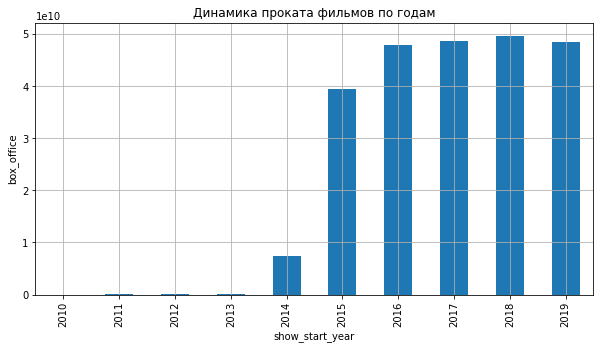

In [81]:
# группировка значений и 
# построение столбчатой диаграммы

df.groupby('show_start_year')['box_office'].sum().plot(
    x = 'show_start_year', y = 'box_office', kind = 'bar', grid = True, figsize = (10,5)
)
plt.title('Динамика проката фильмов по годам')
plt.ylabel('box_office')
plt.show()

Согласно столбчатой диаграмме мы видим, что с `2014` до `2018` происходит рост по сумме сборов, далее сумма сборов уменьшается.

В `2018` году самая максимальная сумма сборов была где то около `2 миллиардов`, а минимальная сумма была в `2010`. Далее мы видим, что в `2011`, `2012` и `2013` годах сумма сборов совсем немного выше `2010` года и не превышает `1,5 миллионов`.

Однако, согласно данным, не по всем годам дана полная информация о фильмах, вышедших в прокат, где то такая информация отсутствует в большей степени. Как раз таки в `2010`, `2011`, `2012` и `2013` подобная информация представлена в малом количестве от общего числа всех фильмов, которые получили прокатные удостоверения.

## Построение сводной таблицы для подсчёта средней и медианной суммы сборов для каждого года.

In [82]:
# создание сводной таблицы

table_box_office_mean_median = df.pivot_table(index = 'show_start_year' , values = 'box_office', aggfunc = ['mean', 'median'])
table_box_office_mean_median.columns = ['mean_box_office', 'median_box_office']
table_box_office_mean_median

,mean_box_office,median_box_office
show_start_year,,
2010,23130.04,1700.00
2011,129383.17,3000.00
2012,54339.24,5660.00
2013,161954.92,3522.50
2014,26684415.27,18160.00
2015,84940570.32,4920933.00
2016,91000569.85,3846679.40
2017,136032793.33,9968340.00
2018,104565059.23,8891102.20


Согласно сводной таблице мы видим, что средняя сумма сборов сильно отличается от медианной. Однако, при подсчёте значений с помощью медианы значения получаются более точные, поэтому медианная сумма сборов более верная по сравнению со средней.

Также, стоит отметить, что медианная сумма сборов в 2017 году самая высокая, а самая низкая в 2010 году. 

## Определение влияния возрастного ограничения аудитории на сборы фильма в прокате по годам. Определение фильмов с возрастным ограничением, собравших больше всего денег в прокате.  

In [83]:
# создание переменной 'df_period_of_years', где
# сохранён срез данных таблицы df

df_period_of_years = df.query('show_start_year >= 2015')

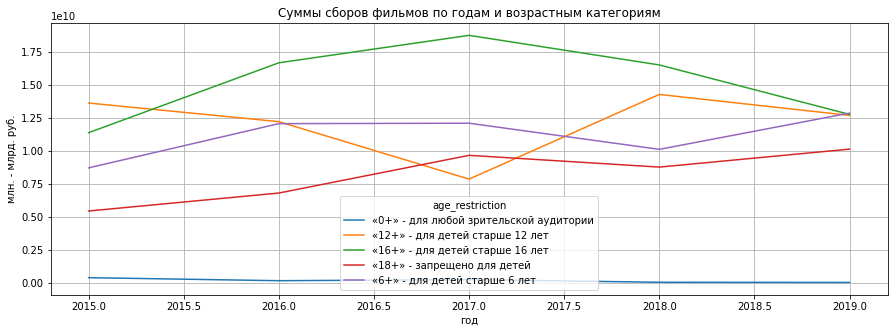

In [84]:
# создание сводной таблицы и 
# построение линейного графика

df_period_of_years.pivot_table(
    index = 'show_start_year', values = 'box_office', 
    columns = 'age_restriction', aggfunc = 'sum'
).plot(grid = True, figsize = (15,5))
plt.title('Суммы сборов фильмов по годам и возрастным категориям')
plt.ylabel('млн. - млрд. руб.')
plt.xlabel('год')
plt.show()

Согласно графику можно утверждать, что возрастное ограничение аудитории влияет на сборы фильма в прокате.

Мы видим, что фильмы с возрастным ограничением `16+` собрали больше всего денег в прокате, самый пик кассовых сборов наблюдается в 2017 году и составил около `1,9 миллиардов рублей`.

Также, можно заметить, что картина меняется в зависимости от года. Фильмы с возрастным ограничением `12+` имеют не такое стабильное положение по сравнению с фильмами других категорий. В начале `2015` года данные фильмы имели самый больший успех в плане кассовых сборов, однако после они стали опускаться до `2017` года и их кассовые сборы были практически ниже всех других фильмов, кроме `0+`. Однако, с `2017` они стали подниматся и к началу `2019` года достигли одинаковых показателей с фильмами, категории `16+` и `6+`.

Возможно, что смена фильмов с разным возрастным ограничением в определённое время зависит от популярности вида фильмов на тот момент, количества выпущенных фильмов с определённым возрастным ограничением и суммы кассового сбора соответственно.

## Исследование фильмов, которые получили государственную поддержку.

### Просмотр средств, выделяемых на поддержку кино.

In [85]:
# создание таблицы, где 
# указан срез данных по столбцу 'amount_of_support'

df_films_support = df.query('amount_of_support != 0 and amount_of_support != "nan"')

In [86]:
# просмотр таблицы df_films_support

df_films_support.head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_year,first_director,major_genre,amount_of_support
0,открытый простор,221048915,2015-11-27 12:00:00,художественный,"тачстоун пикчерз, кобальт пикчерз, бикон пикче...",США,Кевин Костнер,"дэвид валдес, кевин костнер, джейк эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,не определён,7.20,"боевик,драма,мелодрама",NaN,2015,Кевин Костнер,боевик,NaN
1,особо важное задание,111013716,2016-09-13 12:00:00,художественный,"киностудия ""мосфильм""",СССР,Е.Матвеев,не определён,«6+» - для детей старше 6 лет,NaN,NaN,NaN,не определён,6.60,"драма,военный",NaN,2016,Е.Матвеев,драма,NaN
2,особо опасен,221038416,2016-10-10 12:00:00,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",США,Тимур Бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яйн смит",«18+» - запрещено для детей,NaN,NaN,NaN,не определён,6.80,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика,NaN
3,особо опасен,221026916,2016-06-10 12:00:00,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",США,Тимур Бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яйн смит",«18+» - запрещено для детей,NaN,NaN,NaN,не определён,6.80,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика,NaN
4,особо опасен,221030815,2015-07-29 12:00:00,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",США,Тимур Бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яйн смит",«18+» - запрещено для детей,NaN,NaN,NaN,не определён,6.80,"фантастика,боевик,триллер",NaN,2015,Тимур Бекмамбетов,фантастика,NaN


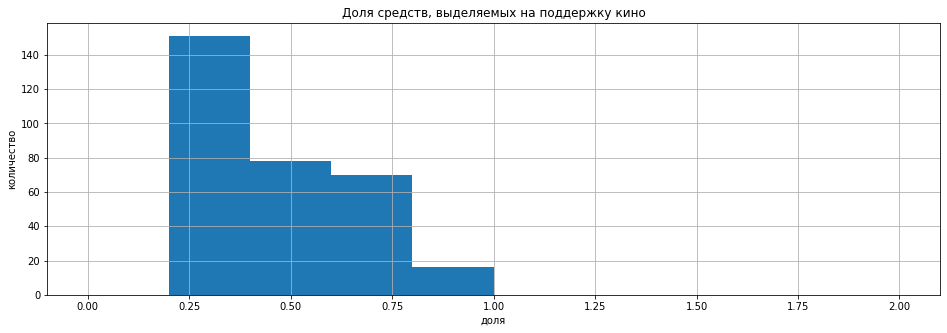

In [87]:
# построение гистограммы для столбца 'amount_of_support'

df_films_support.hist('amount_of_support', bins = 10, range = (0,2), figsize = (16,5))
plt.title('Доля средств, выделяемых на поддержку кино')
plt.xlabel('доля')
plt.ylabel('количество')
plt.show()

По гистограмме мы видим, что, в основном, доля средств, выделяемых на поддержку кино, значится в цифрах от `0.20` до `0.40` от общего бюджета.

Меньше всего встречаются случаи, когда доля государственной поддержки составляет от `0.80` до `0.96`.

Также, стоит заметить, что доля государственной поддержки начинается с цифры `0.20`, меньше доли средств, выделяемой на поддержку кино, не встречается.

### Просмотр окупаемости фильмов с государственной поддержкой.

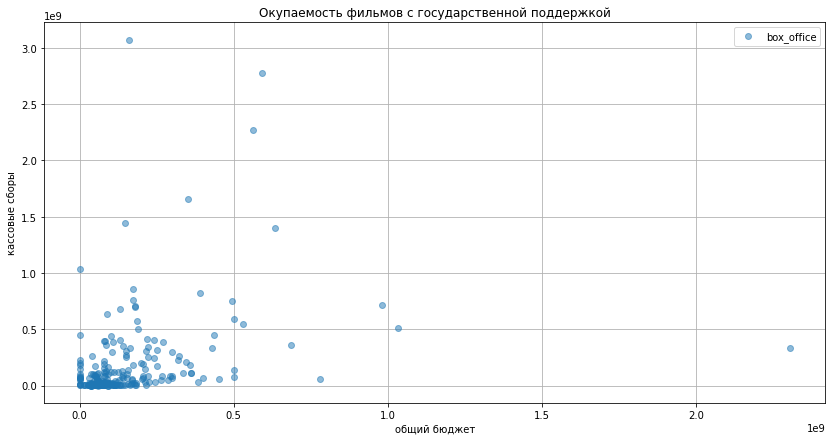

In [88]:
# построение точечной диаграммы

df_films_support.plot(
    x = 'budget', y = 'box_office', style = 'o' , grid = True, figsize = (14,7), alpha = 0.5 
) 
plt.title('Окупаемость фильмов с государственной поддержкой')
plt.xlabel('общий бюджет')
plt.ylabel('кассовые сборы')
plt.show()

По графику мы видим, что окупаемость существует, но, в большинстве случаев, она небольшая.

Есть значения, где кассовые сборы намного больше общего бюджета, однако, таких значений малое количество.

### Просмотр рейтинга фильмов с государственной поддержкой.

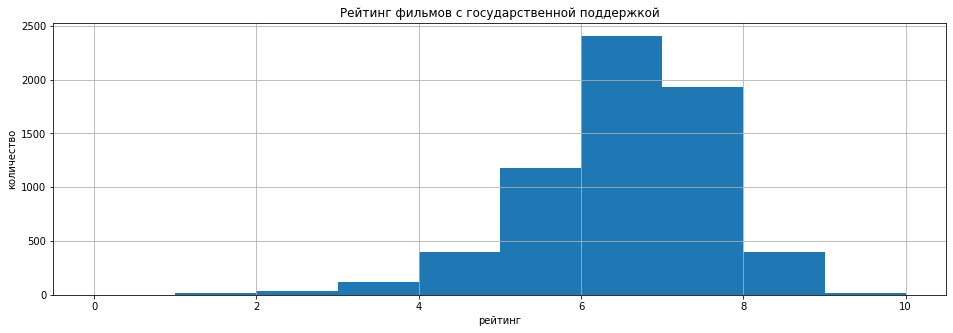

In [89]:
# построение гистограммы для столбца 'ratings'

df_films_support.hist('ratings', bins = 10, range = (0,10), figsize = (16,5))
plt.title('Рейтинг фильмов с государственной поддержкой')
plt.xlabel('рейтинг')
plt.ylabel('количество')
plt.show()

По гистограмме мы видим, что, в большинстве случаев, рейтинг фильмов с государственной поддержкой это цифры от `6.0` до `7.0`, что говорит о неплохих результатах и средней популярности данных фильмов.

Также, стоит отметить, что редко встречаются фильмы из данной категории с рейтингом `1.0` или `10.0`

# 5. Общий вывод <a id='intro4'></a>

В процессе исследования для начала мы провели предобработку данных:

1) заменили пропущенные значения в столбцах `film_studio`, `production_country`, `director`, `producer`, ` financing_source` и  `genres`;

2) перевели значения к типу `float` в столбце `ratings`;

3) изменили в столбце `show_stat_date` тип данных на `datetime` и убрали часовой пояс;

4) привели название столбца `puNumber` к нижнему регистру и добавили нижнее подчёркивание;

5) убрали в столбце:
* `title` лишние символы, пробелы в начале и в конце строки, тем самым удалили неявные дубликаты, привели значения к нижнему регистру;  
* `type` пробелы в начале и в конце строки, тем самым удалили неявные дубликаты, привели значения к нижнему регистру;  
* `production_country` и `director` пробелы в начале и в конце строки;
* `producer` лишние символы, пробелы в начале и в конце строки, привели значения к нижнему регистру.

6) заменили в столбце `film_studio` следующие значения: `Пикчерс` на `Пикчерз`, `Продакшен, Продакшнз, Продакшнс` на `Продакшн` и `Фильмс, Фильмз, Филмс` на `Филмз`, `Коламбиа, Каламбиа` на `Коламбия`, тем самым удалив неявные дубликаты и  привели значения к нижнему регистру. 

Далее сделали необходимы расчёты и добавили столбцы с новой информацией о фильмах, а именно:

* столбец `show_start_year` с информацией о годе проката;
* столбец `first_director` с именем и фамилией главного режиссёра и столбец `major_genre` с основным жанром фильма;
* столбец `amount_of_support` с долей государственной поддержки от общего бюджета.

Следующим шагом был исследовательский анализ данных, в котором мы выявили:

* С каждым годом доля фильмов, вышедших в прокат, возрастает. Самый максимум насчитывается в 2017 году, там доля составила 0.71 от общего числа фильмов, получивших прокатное удостоверение;


* В `2018` году самая максимальная сумма сборов была где то около `2 миллиардов`, а минимальная сумма была в `2010`. Однако, в `2011`, `2012` и `2013` годах сумма сборов совсем немного выше `2010` года и не превышает `1,5 миллионов`.


* Фильмы с возрастным ограничением `16+` собрали больше всего денег в прокате, самый пик кассовых сборов наблюдается в 2017 году и составил около `1,9 миллиардов рублей`. Однако, стоит отметить, что так было не всегда, в начале `2015` года самыми популярными были фильмы с ограничением в `12+`, а в начале `2019` сразу три категории фильмов: `6+`, `12+` и `16+`.

Однако, исходя из анализа, данные представлены и распределены по годам не в полном объёме, где то данных намного больше, а где то наоборот, поэтому для более точной информации, указанной выше, необходимо, чтобы были представлены приблизительные по количеству значения. 

* В основном, доля средств, выделяемых на поддержку кино, значится в цифрах от `0.20` до `0.40` от общего бюджета. Меньше всего встречаются случаи, когда доля государственной поддержки составляет от `0.80` до `0.96`;


* У фильмов с государственной поддержкой средний рейтинг от `6.0` до `7.0`, однако, окупаемость данных фильмов низкая, поэтому, можно сказать, что подобные фильмы интересны зрителю, но у них существует своя, определённая аудитория. 